In [1]:
from typing import List, Optional, Tuple, Union

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

import utils as u
from models import morales2009, pentzer2014pow, pentzer2022
from steps import preprocess
from visualization import papermode

papermode(plt, size=18)


In [2]:
def abbrange(letter:str, a:int, b:int)->Tuple[str]:
    return (f"{letter}{i:02}" for i in range(a,b))

In [3]:
d_abbrs = (*abbrange("D", 1, 7), "D09", "D11", "D12", "D13", "D14", "D16", *abbrange("D", 18, 23))
m_abbrs = abbrange("M", 1, 8)
r_abbrs = ("R02", "R03", "R07", "R08", "R09", "R10", "R12", "R14")
p_abbrs = abbrange("P", 1, 12)
s_abbrs = (*abbrange("S", 1, 11), "S21", "S22", "S23", "S28", "S29", "S30", "S31")
t_abbrs = ("TA", "TB", "TC")

abbrs = (
    # *m_abbrs,
    # *r_abbrs,
    # *p_abbrs,
    *d_abbrs,
    # *s_abbrs,
    # *t_abbrs,
)


In [4]:

colors = u.COLORS
cols = {a: colors[u.get_terrain(a)] for a in abbrs}

# Simple labels
splabs = u.COLORS

def add_terrain_legend(mpl_elem: Union[mpl.axes.Axes, mpl.figure.Figure], highlighted: Optional[List[str]] = None):
    legend_handles = [mpatches.Patch(color=col, label=lab) for lab, col in splabs.items()]
    if highlighted is not None:
        legend_handles.extend([mpatches.Patch(color="xkcd:bright red", label=lab) for lab in highlighted])
    # mpl_elem.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0), loc="lower left")
    mpl_elem.legend(
        handles=legend_handles, ncol=len(colors), bbox_to_anchor=(0.5, -0.03), loc="upper center", title="Terrain"
    )


In [5]:
m2009_dfs = {}
for abbr in abbrs:
    preprocess(abbr, verbose=False)
    m2009df = morales2009.morales2009(abbr, verbose=False);
    m2009_dfs[abbr] = m2009df


D20: 100%|██████████| 109/109 [00:03<00:00, 27.46it/s]
/home/norlab/code/202206/terrain-code/utils/ssmr_utils.py:186: RuntimeWarning: invalid value encountered in double_scalars
  return (measure - theoretical) / theoretical
D22: 100%|██████████| 378/378 [00:02<00:00, 156.30it/s]


In [6]:
p2014_dfs = {}
for abbr in abbrs:
    preprocess(abbr, verbose=False)
    p2014df = pentzer2014pow.pentzer2014pow(abbr, verbose=False);
    p2014_dfs[abbr] = p2014df

D20: 100%|██████████| 109/109 [00:00<00:00, 3498.30it/s]
/home/norlab/code/202206/terrain-code/utils/ssmr_utils.py:186: RuntimeWarning: invalid value encountered in double_scalars
  return (measure - theoretical) / theoretical
D22: 100%|██████████| 378/378 [00:00<00:00, 3938.04it/s]


In [7]:
p2022_dfs = {}
for abbr in abbrs:
    preprocess(abbr, verbose=False)
    p2022df = pentzer2022.pentzer2022(abbr, verbose=False);
    p2022_dfs[abbr] = p2022df


D20: 100%|██████████| 109/109 [00:00<00:00, 8010.71it/s]
/home/norlab/code/202206/terrain-code/utils/ssmr_utils.py:186: RuntimeWarning: invalid value encountered in double_scalars
  return (measure - theoretical) / theoretical
D22: 100%|██████████| 378/378 [00:00<00:00, 8964.52it/s]


# Morales 2009

In [8]:
model_name = morales2009.__MODEL_NAME__.title()
figdir = u.get_figdir("summary", subdir=f"warthog-doughnut/{model_name}")
model_name = morales2009.__MODEL_NAME__.title()

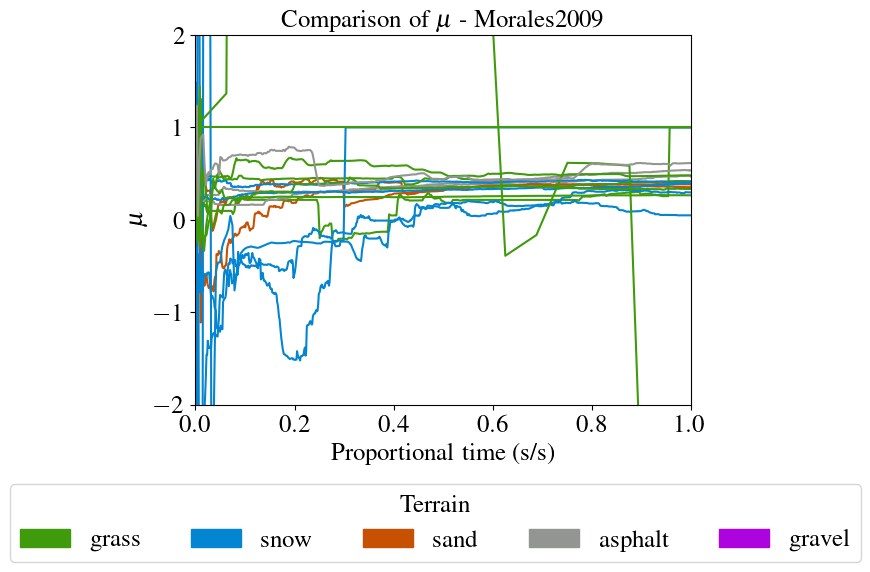

In [9]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(m2009_dfs[abbr].time_prop, m2009_dfs[abbr].m_sym, col, label=abbr)
ax.set_ylim(bottom=-2, top=2)
ax.set_xlim(left=0, right=1)
add_terrain_legend(fig)
ax.set_xlabel("Proportional time (s/s)")
ax.set_ylabel("$\mu$")
ax.set_title(f"Comparison of $\mu$ - {model_name}")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_mu.{ext}", bbox_inches="tight")

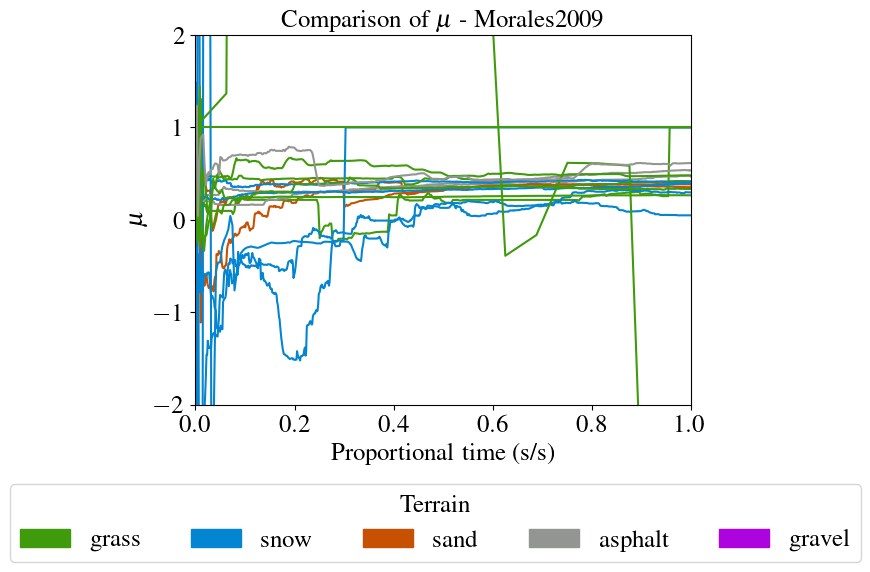

In [10]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(m2009_dfs[abbr].time_prop, m2009_dfs[abbr].m_asym, col, label=abbr)
ax.set_ylim(bottom=-2, top=2)
ax.set_xlim(left=0, right=1)
add_terrain_legend(fig)
ax.set_xlabel("Proportional time (s/s)")
ax.set_ylabel("$\mu$")
ax.set_title(f"Comparison of $\mu$ - {model_name}")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_amu.{ext}", bbox_inches="tight")


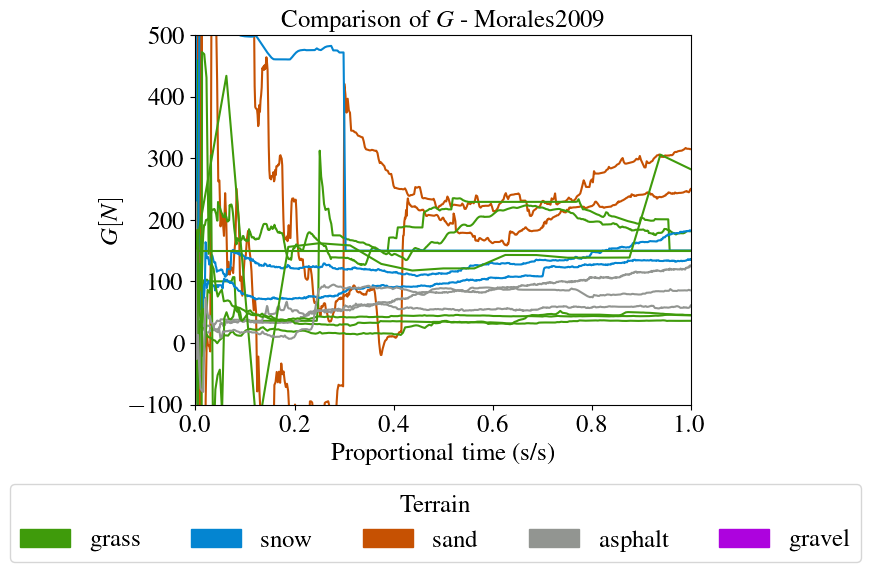

In [11]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(m2009_dfs[abbr].time_prop, m2009_dfs[abbr].G_sym, col, label=abbr)
ax.set_ylim(bottom=-100, top=500)
ax.set_xlim(left=0, right=1)
add_terrain_legend(fig)
ax.set_xlabel("Proportional time (s/s)")
ax.set_ylabel("$G [N]$")
ax.set_title(f"Comparison of $G$ - {model_name}")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_G.{ext}", bbox_inches="tight")

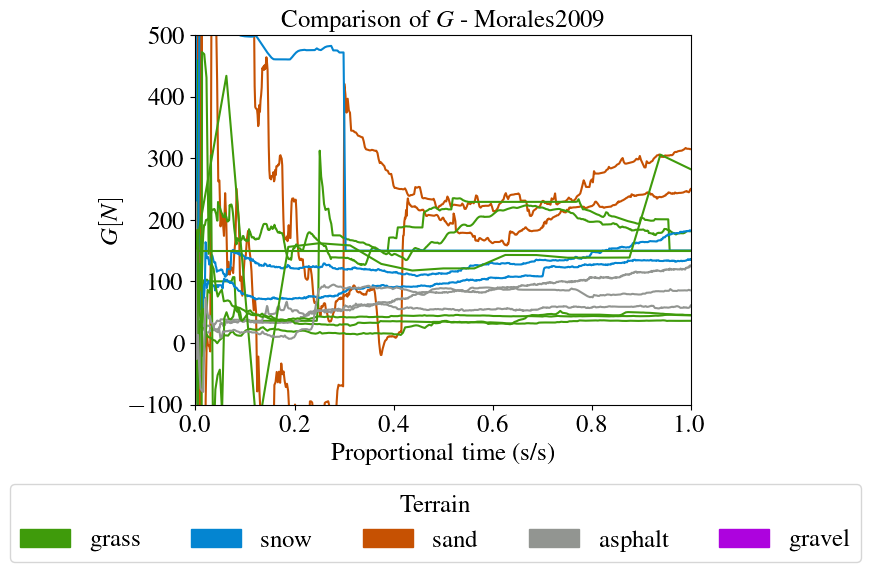

In [12]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(m2009_dfs[abbr].time_prop, m2009_dfs[abbr].G_asym, col, label=abbr)
ax.set_ylim(bottom=-100, top=500)
ax.set_xlim(left=0, right=1)
add_terrain_legend(fig)
ax.set_xlabel("Proportional time (s/s)")
ax.set_ylabel("$G [N]$")
ax.set_title(f"Comparison of $G$ - {model_name}")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_aG.{ext}", bbox_inches="tight")

# Pentzer 2014 Power

In [13]:
model_name = pentzer2014pow.__MODEL_NAME__.title()
figdir = u.get_figdir("summary", subdir=f"warthog-doughnut/{model_name}")
model_name = pentzer2014pow.__MODEL_NAME__.title()

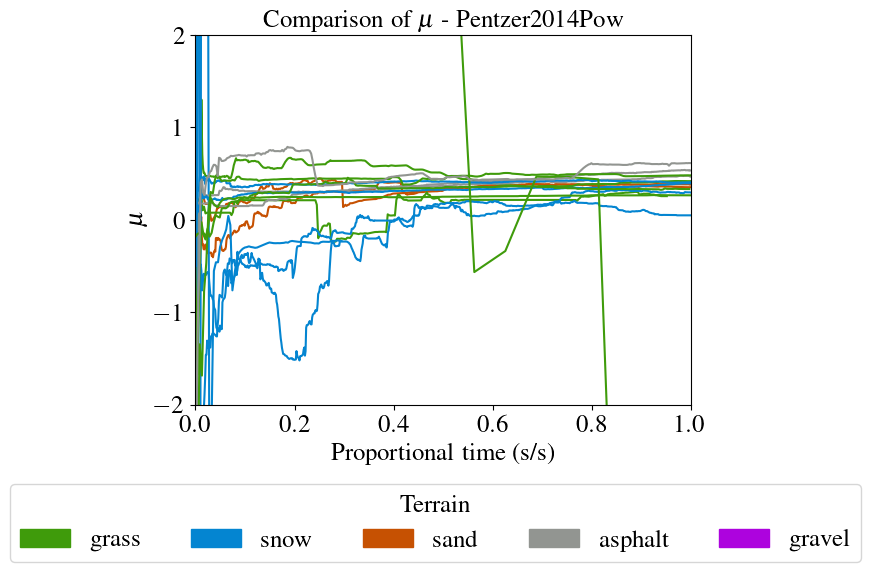

In [14]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(p2014_dfs[abbr].time_prop, p2014_dfs[abbr].m_sym, col, label=abbr)
ax.set_ylim(bottom=-2, top=2)
ax.set_xlim(left=0, right=1)
add_terrain_legend(fig)
ax.set_xlabel("Proportional time (s/s)")
ax.set_ylabel("$\mu$")
ax.set_title(f"Comparison of $\mu$ - {model_name}")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_mu.{ext}", bbox_inches="tight")

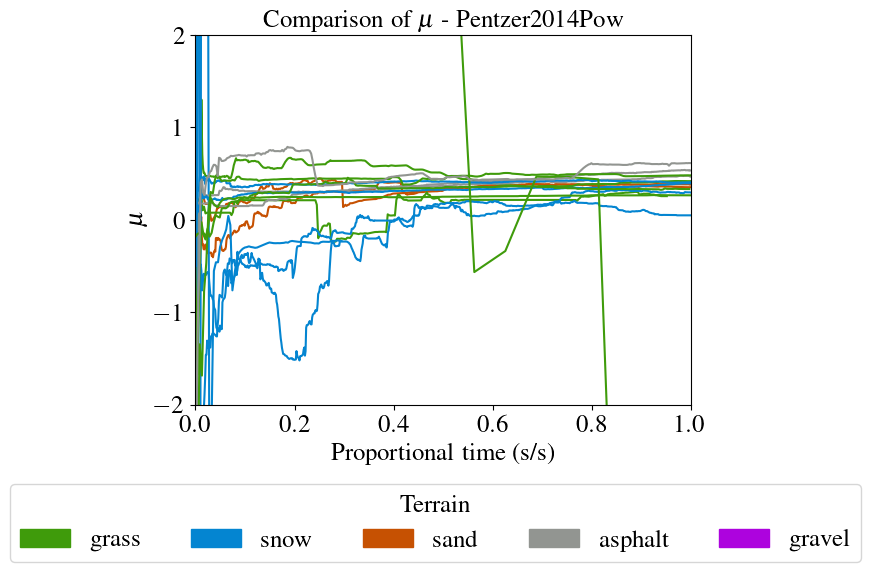

In [15]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(p2014_dfs[abbr].time_prop, p2014_dfs[abbr].m_asym, col, label=abbr)
ax.set_ylim(bottom=-2, top=2)
ax.set_xlim(left=0, right=1)
add_terrain_legend(fig)
ax.set_xlabel("Proportional time (s/s)")
ax.set_ylabel("$\mu$")
ax.set_title(f"Comparison of $\mu$ - {model_name}")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_amu.{ext}", bbox_inches="tight")

In [16]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(p2014_dfs[abbr].time_prop, p2014_dfs[abbr].G_sym, col, label=abbr)
ax.set_ylim(bottom=-100, top=500)
ax.set_xlim(left=0, right=1)
add_terrain_legend(fig)
ax.set_xlabel("Proportional time (s/s)")
ax.set_ylabel("$G [N]$")
ax.set_title(f"Comparison of $G$ - {model_name}")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_G.{ext}", bbox_inches="tight")

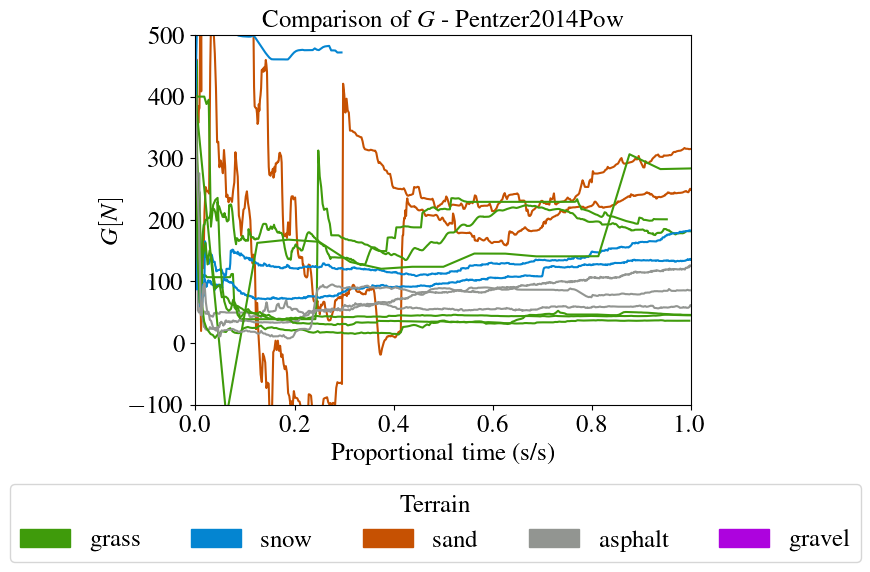

In [17]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(p2014_dfs[abbr].time_prop, p2014_dfs[abbr].G_asym, col, label=abbr)
ax.set_ylim(bottom=-100, top=500)
ax.set_xlim(left=0, right=1)
add_terrain_legend(fig)
ax.set_xlabel("Proportional time (s/s)")
ax.set_ylabel("$G [N]$")
ax.set_title(f"Comparison of $G$ - {model_name}")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_aG.{ext}", bbox_inches="tight")

# Pentzer 2022

In [18]:
model_name = pentzer2022.__MODEL_NAME__.title()
figdir = u.get_figdir("summary", subdir=f"warthog-doughnut/{model_name}")
model_name = pentzer2022.__MODEL_NAME__.title()

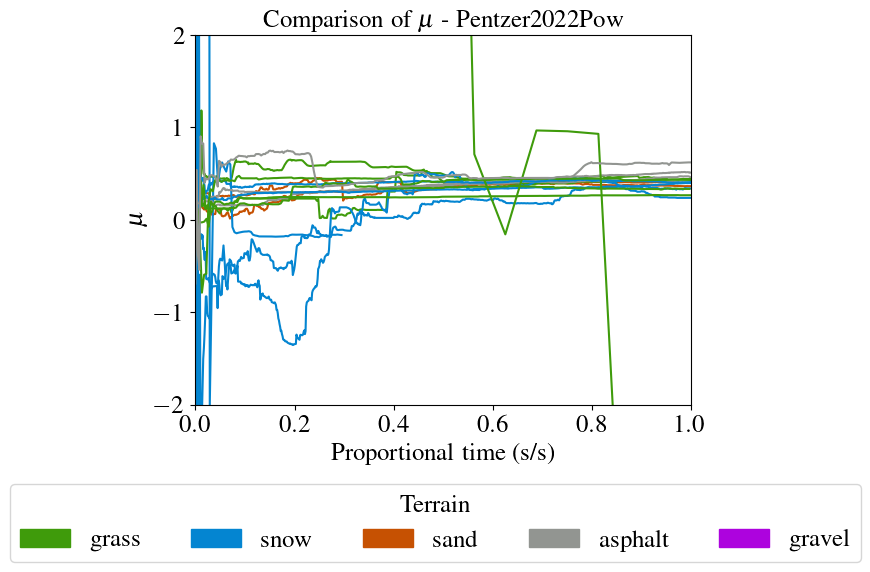

In [19]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(p2022_dfs[abbr].time_prop, p2022_dfs[abbr].m_sym, col, label=abbr)
ax.set_ylim(bottom=-2, top=2)
ax.set_xlim(left=0, right=1)
add_terrain_legend(fig)
ax.set_xlabel("Proportional time (s/s)")
ax.set_ylabel("$\mu$")
ax.set_title(f"Comparison of $\mu$ - {model_name}")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_mu.{ext}", bbox_inches="tight")

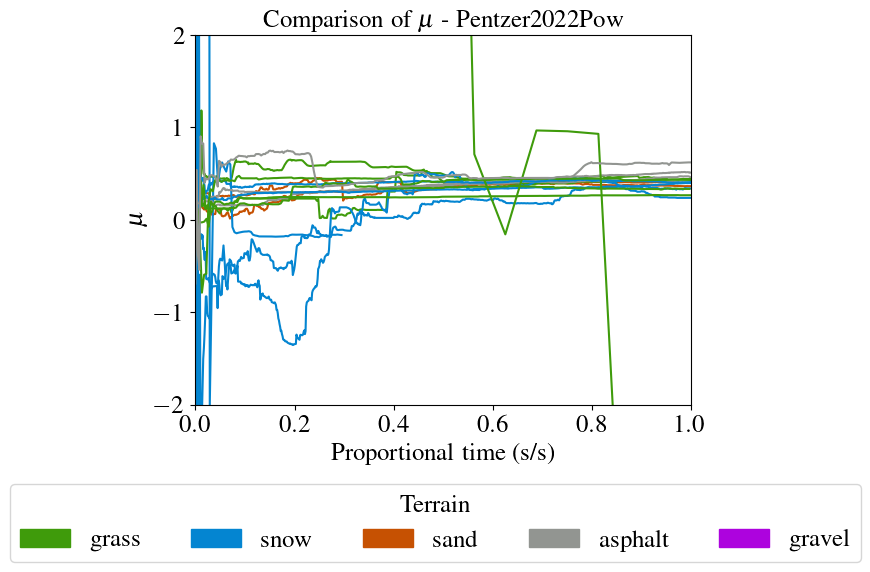

In [20]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(p2022_dfs[abbr].time_prop, p2022_dfs[abbr].m_asym, col, label=abbr)
ax.set_ylim(bottom=-2, top=2)
ax.set_xlim(left=0, right=1)
add_terrain_legend(fig)
ax.set_xlabel("Proportional time (s/s)")
ax.set_ylabel("$\mu$")
ax.set_title(f"Comparison of $\mu$ - {model_name}")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_amu.{ext}", bbox_inches="tight")

In [21]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(p2022_dfs[abbr].time_prop, p2022_dfs[abbr].G_sym, col, label=abbr)
ax.set_ylim(bottom=-100, top=500)
ax.set_xlim(left=0, right=1)
add_terrain_legend(fig)
ax.set_xlabel("Proportional time (s/s)")
ax.set_ylabel("$G [N]$")
ax.set_title(f"Comparison of $G$ - {model_name}")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_G.{ext}", bbox_inches="tight")

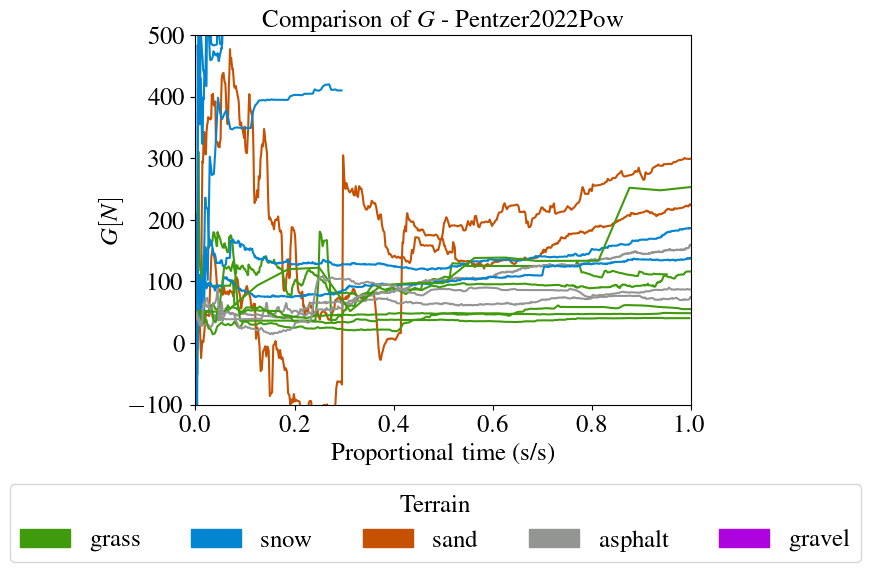

In [22]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(p2022_dfs[abbr].time_prop, p2022_dfs[abbr].G_asym, col, label=abbr)
ax.set_ylim(bottom=-100, top=500)
ax.set_xlim(left=0, right=1)
add_terrain_legend(fig)
ax.set_xlabel("Proportional time (s/s)")
ax.set_ylabel("$G [N]$")
ax.set_title(f"Comparison of $G$ - {model_name}")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_aG.{ext}", bbox_inches="tight")

In [23]:
abbrs

('D01',
 'D02',
 'D03',
 'D04',
 'D05',
 'D06',
 'D09',
 'D11',
 'D12',
 'D13',
 'D14',
 'D16',
 'D18',
 'D19',
 'D20',
 'D21',
 'D22')